In [722]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [723]:
# Для детектирования лиц используем каскады Хаара
cascadePath = r"D:\Python39\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath)

In [724]:
faceCascade

<CascadeClassifier 000001DB3DF1D230>

In [725]:
image= cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
image.shape

(512, 512)

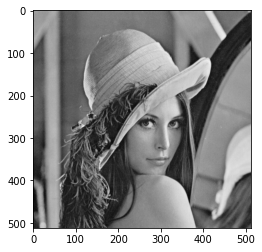

In [726]:
plt.imshow(image, cmap="gray")

In [727]:
# Определяем области где есть лица
#faces = faceCascade.detectMultiScale(image=image, scaleFactor=1.1, minNeighbors=4, minSize=(10, 10), maxSize=(400,400))
faces = faceCascade.detectMultiScale(image=image, scaleFactor=1.1, minNeighbors=4)
faces

array([[219, 203, 169, 169]])

In [728]:
# Рисуем квадраты вокруг лиц
image_with_faces = image.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(image_with_faces, (x, y), (x+w, y+h), (255, 0, 255), 2)

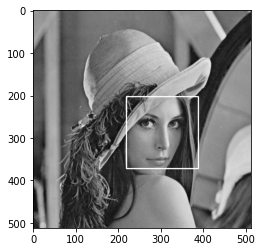

In [729]:
plt.imshow(image_with_faces, cmap="gray")

In [730]:
# Увеличиваем области вокруг обнаруженных лиц на 10%
for i in range(len(faces)):
    (x, y, w, h) = faces[i]
    new_w = int(w * 1.2)
    new_h = int(h * 1.2)
    faces[i, 0] = int(x - (new_w - w) / 2)
    faces[i, 1] = int(y - (new_h - h) / 2)
    faces[i, 2] = new_w
    faces[i, 3] = new_h


In [731]:
for (x, y, w, h) in faces:
    cv2.rectangle(image_with_faces, (x, y), (x + w, y + h), (255, 0, 255), 2)

In [732]:
faces

array([[202, 186, 202, 202]])

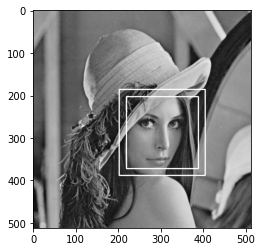

In [733]:
plt.imshow(image_with_faces, cmap="gray")

In [734]:
image_with_faces = image.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(image_with_faces, (x, y), (x + w, y + h), (255, 0, 255), 2)

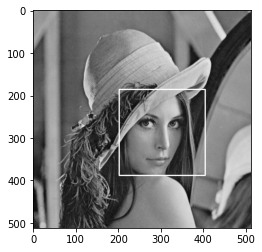

In [735]:
plt.imshow(image_with_faces, cmap="gray")


In [736]:
(x, y, w, h) = faces[0]
img_face = image[y: y + w, x: x + h]

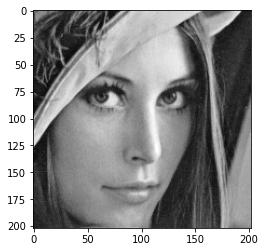

In [737]:
plt.imshow(img_face, cmap="gray")

In [738]:
edges = cv2.Canny(img_face, 50, 100, apertureSize=3)

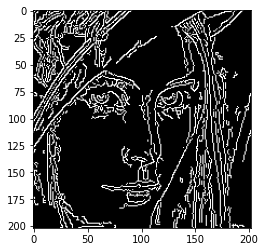

In [739]:
plt.imshow(edges, cmap="gray")

In [764]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [765]:
# Создаем список контуров с шириной и длиной не меньше 10
filtered_contours = []
for contour in contours:
    if cv2.arcLength(contour, True) / 2 >= 20:
        filtered_contours.append(contour)

In [766]:
# Инициализируем маску рисуем на ней контуры
the_mask = np.zeros_like(edges)
cv2.drawContours(the_mask, filtered_contours, -1, (255, 255, 255), cv2.FILLED)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

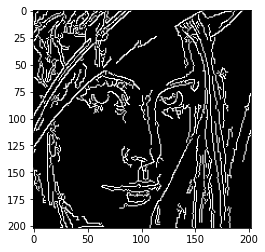

In [767]:
cleaned_edges = cv2.bitwise_and(edges, edges, mask = the_mask)
plt.imshow(cleaned_edges, cmap="gray")

In [768]:
    kernel = np.ones((5, 5), 'uint8')
    dilate_img = cv2.dilate(cleaned_edges, kernel, iterations=1)

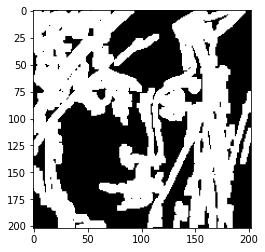

In [769]:
plt.imshow(dilate_img, cmap="gray")

In [770]:
dilate_smooth_img = cv2.GaussianBlur(dilate_img, (5, 5), cv2.BORDER_DEFAULT)

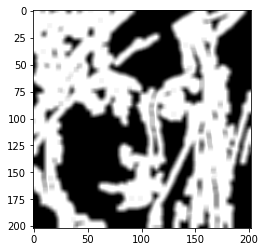

In [771]:
plt.imshow(dilate_smooth_img, cmap="gray")

In [772]:
M = cv2.normalize(dilate_smooth_img, dst=None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

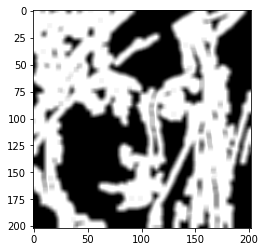

In [773]:
plt.imshow(M, cmap="gray")

In [774]:
image = cv2.imread('lena.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
(x, y, w, h) = faces[0]
img_face = image[y: y + w, x: x + h]
F1 = cv2.bilateralFilter (img_face, d=15, sigmaColor=80, sigmaSpace=80, borderType = cv2.BORDER_DEFAULT )

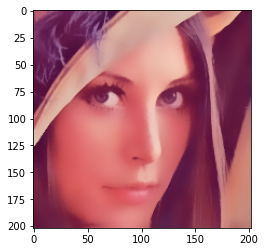

In [775]:
plt.imshow(F1)

In [776]:
edge_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
F2 = cv2.filter2D(img_face, -1, edge_kernel)

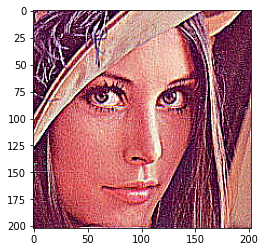

In [777]:
plt.imshow(F2)

In [754]:
h, w, ch = img_face.shape

In [755]:
res_img = img_face.copy()

In [756]:
for x in range(w):
    for y in range(h):
        for c in range(ch):
            res_img[x, y, c] = M[x, y] * F2[x, y, c] + (1 - M[x, y]) *  F1[x, y, c]
            

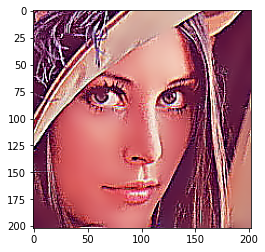

In [757]:
plt.imshow(res_img)